In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Get Data

In [ ]:
from nextwind.preproc import make_datasets

In [ ]:
datasets = make_datasets(forecast_data='MERRA2') # Tuple containing train, val & test sets

In [ ]:
pd.DataFrame(datasets['train'][0])

# Create sequence window

In [3]:
from nextwind.preproc_ds import SequenceGenerator

In [4]:
n_steps_in = 48
n_steps_out = 12

In [6]:
window = SequenceGenerator(n_steps_in, n_steps_out, n_steps_out,
                           dataset, label_columns=['Power'])

### Window details ### 
 Total window size: 60
Input column name(s): ['Power', 'Rotor Speed', 'Wind Speed', 'Blade Pitch', 'Nacelle_X', 'Nacelle_Y', 'Wind_X', 'Wind_Y', 'Forecast_wind_speed', 'Forecast_X', 'Forecast_Y']
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['Power']
Label indices: [48 49 50 51 52 53 54 55 56 57 58 59] 

### Train Regr_48in_12out sequences loaded ###
### Val Regr_48in_12out sequences loaded ###
### Test Regr_48in_12out sequences loaded ###


# Retrieve sequences

In [9]:
# Retrieve train set sequences
X_train, y_train = window.train.values()
X_train.shape, y_train.shape

((6150, 48, 11), (6150, 12, 1))

## Another way of retrieving sequences / updating window with new dataset

In [10]:
# Another option to retrieve the values again, or update window sequences with a new dataset
train, val, test = window.get_sequences(datasets)

NameError: name 'datasets' is not defined

In [ ]:
# This also works to retrieve specific datasets
X_train = window.train['X']
X_train

# Model Selection

In [11]:
val_performance = {}
test_performance = {}

## Baseline Model

In [12]:
from nextwind.models import Baseline_model

In [57]:
baseline = Baseline_model(window)

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance['Baseline'] = baseline.evaluate(x=window.val['X'], y=window.val['y'], verbose=1)
test_performance['Baseline'] = baseline.evaluate(x=window.test['X'], y=window.test['y'], verbose=1)

28/28 [==============================] - 0s 999us/step - loss: 426885.5312 - mean_absolute_error: 558.1418


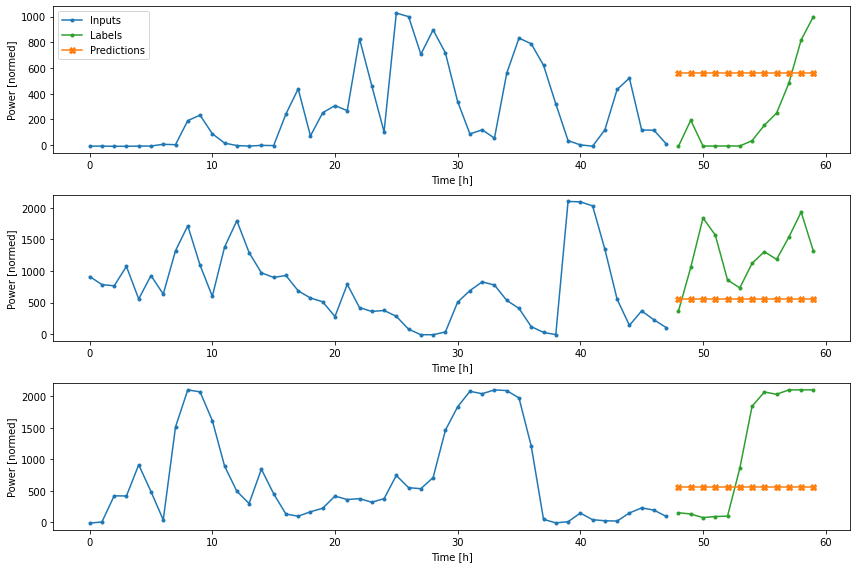

In [58]:
window.plot(baseline)

## Dense Model

In [59]:
from nextwind.trainer import trainer

In [61]:
trainer()

### Fetching 25xWTG data ###
### Fetching weather forecast data from MERRA2 ###
### Preparing train, val & test datasets ###
### Window details ### 
 Total window size: 30
Input column name(s): ['Power', 'Rotor Speed', 'Wind Speed', 'Blade Pitch', 'Nacelle_X', 'Nacelle_Y', 'Wind_X', 'Wind_Y', 'Forecast_wind_speed', 'Forecast_X', 'Forecast_Y']
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Forecast column name(s): ['Forecast_wind_speed', 'Forecast_X', 'Forecast_Y']
Forecast indices: [24 25 26 27 28 29]
Label column name(s): ['Power']
Label indices: [24 25 26 27 28 29] 

### Generating train sequences ###


FileNotFoundError: [Errno 2] No such file or directory: './projectwind/data/Sequences_Class_24in_6out_X_train.npy'